In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from matplotlib.cbook import boxplot_stats

In [38]:
df = pd.read_csv("academic_performance.csv")

In [39]:
df.head()

,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,40.0,F
1,1,2,b,23.0,F
2,2,3,c,50.0,P
3,3,4,d,78.0,P
4,4,5,e,48.0,P


In [40]:
df.tail()

,Unnamed: 0,rollno,name,marks,grade
12,12,13,k,97.0,P
13,13,14,l,NaN,NaN
14,14,15,m,65.0,NaN
15,15,15,n,200.0,P
16,16,16,o,-100.0,F


In [41]:
df.shape

(17, 5)

In [42]:
df.describe()

,Unnamed: 0,rollno,marks
count,17.000000,17.000000,15.000000
mean,8.000000,8.882353,66.866667
std,5.049752,4.871888,61.027941
min,0.000000,1.000000,-100.000000
25%,4.000000,5.000000,49.000000
50%,8.000000,9.000000,76.000000
75%,12.000000,13.000000,89.500000
max,16.000000,16.000000,200.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17 non-null     int64  
 1   rollno      17 non-null     int64  
 2   name        15 non-null     object 
 3   marks       15 non-null     float64
 4   grade       15 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 808.0+ bytes


In [44]:
df.columns

Index(['Unnamed: 0', 'rollno', 'name', 'marks', 'grade'], dtype='object')

In [45]:
df.isna().sum()

Unnamed: 0    0
rollno        0
name          2
marks         2
grade         2
dtype: int64

In [46]:
df["marks"]=df["marks"].fillna(df["marks"].mean())

In [47]:
df

,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,40.000000,F
1,1,2,b,23.000000,F
2,2,3,c,50.000000,P
3,3,4,d,78.000000,P
4,4,5,e,48.000000,P
5,5,6,f,89.000000,P
6,6,7,g,90.000000,P
7,7,8,h,67.000000,P
8,8,9,i,84.000000,P
9,9,10,j,96.000000,P


In [48]:
def fun1(value):
    return int(math.floor(value))

In [49]:
df["marks"]=df["marks"].apply(fun1)

In [50]:
df

,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,40,F
1,1,2,b,23,F
2,2,3,c,50,P
3,3,4,d,78,P
4,4,5,e,48,P
5,5,6,f,89,P
6,6,7,g,90,P
7,7,8,h,67,P
8,8,9,i,84,P
9,9,10,j,96,P


In [51]:
df= df[df["name"].notna()]

In [52]:
df

,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,40,F
1,1,2,b,23,F
2,2,3,c,50,P
3,3,4,d,78,P
4,4,5,e,48,P
5,5,6,f,89,P
6,6,7,g,90,P
7,7,8,h,67,P
8,8,9,i,84,P
9,9,10,j,96,P


In [53]:
for index, row in df.iterrows():
    # print(row['marks'], row['grade'])
    if (row['marks'] > 40):
        df.loc[index, 'grade'] = 'P'
    else:
        df.loc[index, 'grade'] = 'F'

In [54]:
df

,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,40,F
1,1,2,b,23,F
2,2,3,c,50,P
3,3,4,d,78,P
4,4,5,e,48,P
5,5,6,f,89,P
6,6,7,g,90,P
7,7,8,h,67,P
8,8,9,i,84,P
9,9,10,j,96,P


<Axes: xlabel='marks', ylabel='count'>

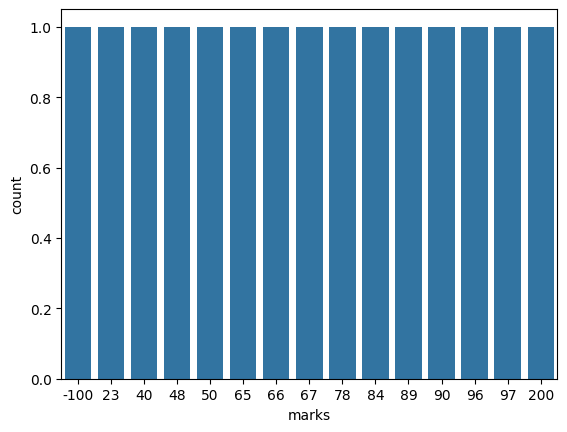

In [19]:
sns.countplot(data=df , x= df["marks"])

<Axes: xlabel='marks'>

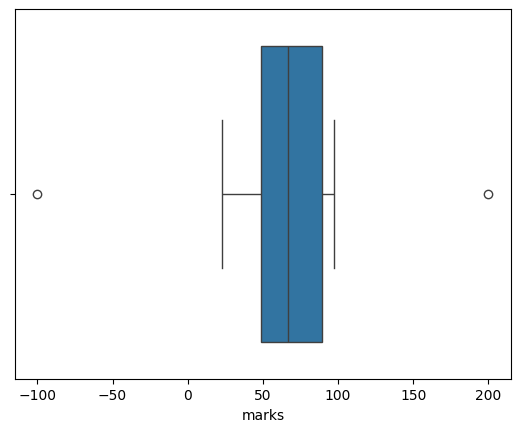

In [20]:
sns.boxplot(data=df,x=df["marks"])

In [21]:
outliers = boxplot_stats(df["marks"]).pop(0)["fliers"]

In [22]:
outliers

array([-100,  200], dtype=int64)

In [23]:
df = df.drop([15,16],axis=0)

In [24]:
df

,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,40,F
1,1,2,b,23,F
2,2,3,c,50,P
3,3,4,d,78,P
4,4,5,e,48,P
5,5,6,f,89,P
6,6,7,g,90,P
7,7,8,h,67,P
8,8,9,i,84,P
9,9,10,j,96,P


In [25]:
scaler = MinMaxScaler()
df[["marks"]]=scaler.fit_transform(df[["marks"]])

In [26]:
df

,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,0.229730,F
1,1,2,b,0.000000,F
2,2,3,c,0.364865,P
3,3,4,d,0.743243,P
4,4,5,e,0.337838,P
5,5,6,f,0.891892,P
6,6,7,g,0.905405,P
7,7,8,h,0.594595,P
8,8,9,i,0.824324,P
9,9,10,j,0.986486,P
